In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['webscraping_results.csv']), encoding="latin1")


Saving webscraping_results_assignment3.csv to webscraping_results_assignment3.csv


In [ ]:
df.head(5)

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Benefits Analyst,Carrols Corporation,"Hybrid remote in Syracuse, NY 13203",3.3,PostedPosted 30+ days ago,NaN,The Benefits Analyst will oversee the employee...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Carrols Corporation (NASDAQ: TAST) headquarter...
1,Business Analyst Team Lead,340Basics,"Melville, NY 11747",NaN,PostedPosted 30+ days ago,NaN,Business analysis: 5 years (Required).\nExperi...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"We are seeking a driven, and passionate indivi..."
2,"Analyst Data â New York, NY - Hybrid-Remote ...",NewYork-Presbyterian Hospital,"Remote in Manhattan, NY 10065",4.1,PostedToday,"$68,500 - $92,500 a year",Strong analytical skills with the ability to c...,https://www.indeed.com/rc/clk?jk=616c9c25f79dd...,"Location\nNew York, New York\nShift:\nDay (Uni..."
3,Clinical Informatics Analyst,Fidelis Care,"Hybrid remote in New York, NY",3.2,PostedPosted 19 days ago,"$79,300 - $142,800 a year",Analyze data sets and scripts to identify erro...,https://www.indeed.com/rc/clk?jk=bc5bca36e3fe1...,You could be the one who changes everything fo...
4,Medical Data Analyst (Medical Coder),NewYork-Presbyterian Hospital,"Remote in Manhattan, NY 10065",4.1,PostedPosted 9 days ago,$39.88 - $47.14 an hour,2-3 years demonstrated coding experience.\nUti...,https://www.indeed.com/rc/clk?jk=d90277af5c82d...,"Location\nNew York, New York\nShift:\nDay (Uni..."


In [ ]:
print("There are {} records in total.".format(len(df)))

There are 1457 records in total.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import nltk
nltk.download("stopwords")
nltk.download("popular")
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
import textblob
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

In [ ]:
## Lower case
df['Descriptions'] = df['Descriptions'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
df['Descriptions'] = df['Descriptions'].str.replace('[^\w\s]',' ')
## digits
df['Descriptions'] = df['Descriptions'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df['Descriptions'] = df['Descriptions'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df['Descriptions'] = df['Descriptions'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Remove '\n'
df = df.replace('\n',' ', regex=True)

print("Preprocessed data: \n")
print(df.head())

<ipython-input-6-7b63737254ac>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Descriptions'] = df['Descriptions'].str.replace('[^\w\s]',' ')
<ipython-input-6-7b63737254ac>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Descriptions'] = df['Descriptions'].str.replace('\d+', '')


Preprocessed data: 

                                               Title  \
0                                   Benefits Analyst   
1                         Business Analyst Team Lead   
2  Analyst Data â New York, NY - Hybrid-Remote ...   
3                       Clinical Informatics Analyst   
4               Medical Data Analyst (Medical Coder)   

                         Company                             Location  Rating  \
0            Carrols Corporation  Hybrid remote in Syracuse, NY 13203     3.3   
1                      340Basics                   Melville, NY 11747     NaN   
2  NewYork-Presbyterian Hospital        Remote in Manhattan, NY 10065     4.1   
3                   Fidelis Care        Hybrid remote in New York, NY     3.2   
4  NewYork-Presbyterian Hospital        Remote in Manhattan, NY 10065     4.1   

                        Date                     Salary  \
0  PostedPosted 30+ days ago                        NaN   
1  PostedPosted 30+ days ago         

In [ ]:
from collections import Counter
from nltk import ngrams

descriptions = df["Descriptions"].tolist()
descrip_text = ""
for item in descriptions:
  descrip_text = descrip_text + " "
  descrip_text = descrip_text + item


In [ ]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

all_stopwords = stopwords.words("english")

new_stop = ["year", "experience", "equal", "opportunity","race", "sexual",
            "orientation", "full", "veteran", "status", "applicant",
            "national", "origin","e", "g", "color", "religion"]
for each in new_stop:
  all_stopwords.append(each)

text_tokens = word_tokenize(descrip_text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
filtered_sentence = (" ").join(tokens_without_sw)

word_list = []; freq_list = []
for i in range(2,10):
  ngram_counts = Counter(ngrams(filtered_sentence.split(), i))
  if i == 2:
    n = 100
  else:
    n = 50
  for each in ngram_counts.most_common(n):
    word, freq = each
    word_list.append(word)
    freq_list.append(freq)

In [ ]:
df_skill = pd.DataFrame()
df_skill['N-gram'] = word_list
df_skill['Frequency'] = freq_list
df_skill = df_skill.sort_values('Frequency', ascending=False)

In [ ]:
df_skill

,N-gram,Frequency
0,"(data, analyst)",774
1,"(new, york)",753
2,"(business, analyst)",752
3,"(data, analysis)",727
4,"(communication, skill)",704
...,...,...
398,"(citi, affirmative, action, employer, qualifie...",18
399,"(receive, consideration, without, regard, sex,...",18
424,"(job, successfully, individual, must, able, pe...",18
425,"(required, reasonable, accommodation, may, mad...",18


(1) Plot the annual salary for each skill

In [ ]:
filtered_list = []
for text in descriptions:
  text_tokens = word_tokenize(text)
  tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
  filtered_sentence = (" ").join(tokens_without_sw)
  filtered_list.append(filtered_sentence)


In [ ]:
extracted_skills = ["data analysis", "communication skill",
                    "problem solving", "data analytics",
                    "team member", "data management",
                    "attention detail", "decision making",
                    "data visualization", "analytical skill",
                    "work independently"]


In [ ]:
import re

df_filtered = pd.DataFrame()
df_filtered["Salary"] = df["Salary"].values
df_filtered["Descriptions"] = filtered_list

salary_overall_list = []
for skill in extracted_skills:
  df_temp1 = df_filtered[df_filtered["Descriptions"].str.contains(skill)]
  df_temp2 = df_temp1[df_temp1["Salary"].notnull()]
  df_temp2 = df_temp2.reset_index(drop=True)

  salary_list = []
  for i in range(0,len(df_temp2["Salary"])):
    salary_str = df_temp2["Salary"].loc[i]
    salary_str = salary_str.replace(",", "")
    val = [int(s) for s in re.findall(r'\b\d+\b', salary_str)]
    salary = np.mean(val)

    # Assume a person works for 40 hours per week and 52 weeks per year
    if "hour" in salary_str:
      salary = salary*40*52
    salary_list.append(salary)

  salary_overall_list.append(np.mean(salary_list))


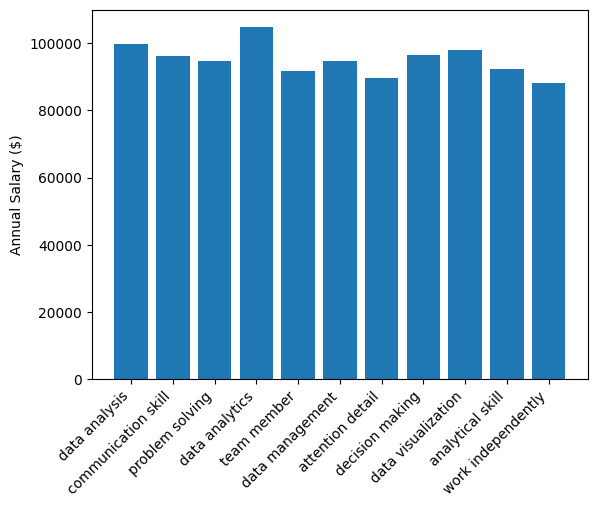

In [ ]:
plt.bar(extracted_skills, salary_overall_list)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Annual Salary ($)")
plt.show()

(2) Plot the number of unique companies for each skill

In [ ]:
df_filtered2 = pd.DataFrame()
df_filtered2["Company"] = df["Company"].values
df_filtered2["Descriptions"] = filtered_list

company_overall_list = []
for skill in extracted_skills:
  df_temp1 = df_filtered2[df_filtered2["Descriptions"].str.contains(skill)]
  df_temp2 = df_temp1[df_temp1["Company"].notnull()]
  company_list = df_temp2["Company"].unique()
  company_overall_list.append(len(company_list))


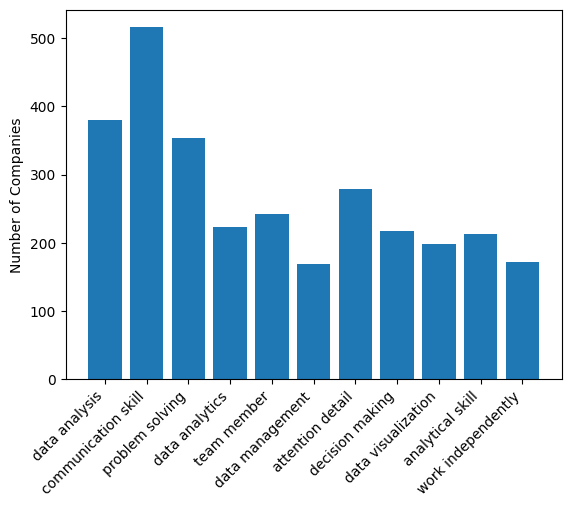

In [ ]:
plt.bar(extracted_skills, company_overall_list)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Companies")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

cv = CountVectorizer(ngram_range=(2, 2))

features = cv.fit(filtered_list)
vector = cv.transform(filtered_list)


In [ ]:
words = features.vocabulary_

# Find the index of the extracted skills
index_list = []

for skill in extracted_skills:
  index_list.append(words[skill])

In [ ]:
# Find the vector for each extracted skill
cols = []
for i in index_list:
    cols.append(vector[:,i])
X_new = np.hstack(cols)

In [ ]:
# Calculate distance matrix
dist_matrix = []
for i in range(0,len(X_new)):
  dist_row = []
  for j in range(0,len(X_new)):
    dist = np.linalg.norm(X_new[i].toarray() - X_new[j].toarray())
    dist_row.append(dist)
  dist_matrix.append(dist_row)

dist_matrix

[[0.0,
  42.46174749112429,
  42.190046219457976,
  45.387222871640866,
  43.278170016764804,
  47.085029467974216,
  41.0,
  41.38840417314975,
  40.45985664828782,
  40.58324777540605,
  41.340053217188775],
 [42.46174749112429,
  0.0,
  28.827070610799147,
  37.21558813185679,
  33.04542328371661,
  39.4715087119811,
  27.964262908219126,
  30.56141357987225,
  32.18695387886216,
  28.77498913987632,
  29.086079144497972],
 [42.190046219457976,
  28.827070610799147,
  0.0,
  35.66510900025401,
  30.643106892089126,
  38.22302970723278,
  26.248809496813376,
  27.622454633866266,
  31.192947920964443,
  25.903667693977237,
  25.632011235952593],
 [45.387222871640866,
  37.21558813185679,
  35.66510900025401,
  0.0,
  36.864617182333525,
  41.53311931459037,
  32.66496594212215,
  31.352830813181765,
  32.17141588429082,
  31.796226191169293,
  32.046840717924134],
 [43.278170016764804,
  33.04542328371661,
  30.643106892089126,
  36.864617182333525,
  0.0,
  39.26830783214372,
  28.8

[Text(0, 0.5, 'data analysis'),
 Text(0, 1.5, 'communication skill'),
 Text(0, 2.5, 'problem solving'),
 Text(0, 3.5, 'data analytics'),
 Text(0, 4.5, 'team member'),
 Text(0, 5.5, 'data management'),
 Text(0, 6.5, 'attention detail'),
 Text(0, 7.5, 'decision making'),
 Text(0, 8.5, 'data visualization'),
 Text(0, 9.5, 'analytical skill'),
 Text(0, 10.5, 'work independently')]

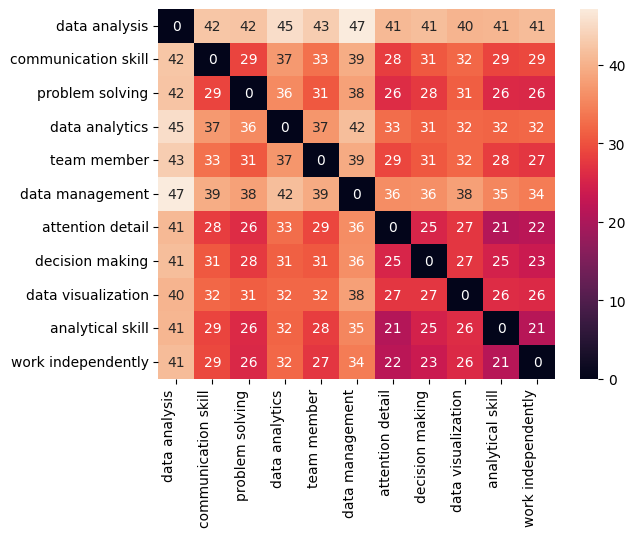

In [ ]:
# Plot distance matrix
import seaborn as sns
ax = sns.heatmap(dist_matrix, annot=True)
ax.set_xticklabels(extracted_skills, rotation=90, ha='right')
ax.set_yticklabels(extracted_skills, rotation=0, ha='right')

In [ ]:
extracted_skills

['data analysis',
 'communication skill',
 'problem solving',
 'data analytics',
 'team member',
 'data management',
 'attention detail',
 'decision making',
 'data visualization',
 'analytical skill',
 'work independently']

Feature 1: Average salary of different skills (obtained in Question 2(b))

In [ ]:
feat_1 = salary_overall_list

Feature 2: Soft or hard skill

In [ ]:
# Soft_skill = 1; Hard_skill = 2
feat_2 = [2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1]

Feature 3: Skill frequency

In [ ]:
feat_3 = []
for skill in extracted_skills:
  count = 0
  for item in filtered_list:
    if skill in item:
      count += 1
  feat_3.append(count)

In [ ]:
feat_3

[443, 634, 396, 254, 291, 185, 308, 241, 223, 236, 193]

Feature 4: Number of companies requiring each skill (obtained in Question 2(b))

In [ ]:
feat_4 = company_overall_list

Feature 5: Average rating of jobs requiring each skill

In [ ]:
feat_5 = []
for skill in extracted_skills:
  rating_list = []
  for i in range(0, len(filtered_list)):
    if skill in filtered_list[i]:
      if not np.isnan(df["Rating"].loc[i]):
        rating_list.append(float(df["Rating"].loc[i]))
  feat_5.append(np.mean(rating_list))

In [ ]:
feat_5

[3.6617210682492582,
 3.656926406926407,
 3.680546075085324,
 3.7141361256544503,
 3.612903225806452,
 3.6597222222222223,
 3.634597156398104,
 3.66875,
 3.6784883720930237,
 3.620348837209302,
 3.663265306122449]

Feature 6: Number of job postings that are fully or partially remote for each skill



In [ ]:
feat_6 = []
for skill in extracted_skills:
  count = 0
  for i in range(0, len(filtered_list)):
    if skill in filtered_list[i]:
      location = df["Location"].loc[i]
      if "remote" in location.lower():
        count += 1
  feat_6.append(count)

In [ ]:
feat_6

[120, 178, 106, 70, 103, 56, 88, 81, 69, 64, 46]

Feature 7: Number of part-time job postings for each skill

In [ ]:
feat_7 = []
for skill in extracted_skills:
  count = 0
  for i in range(0, len(filtered_list)):
    if skill in filtered_list[i]:
      if "part time" in filtered_list[i]:
        count += 1
  feat_7.append(count)

In [ ]:
feat_7

[14, 17, 14, 13, 11, 7, 7, 4, 10, 3, 7]

Feature 8: Number of job postings requiring or preferring Master's Degree for each skill

In [ ]:
feat_8 = []
for skill in extracted_skills:
  count = 0
  for i in range(0, len(filtered_list)):
    if skill in filtered_list[i]:
      if ("masters degree" in filtered_list[i] or "master degree" in filtered_list[i]):
        count += 1
  feat_8.append(count)

In [ ]:
feat_8

[40, 44, 24, 21, 23, 15, 17, 19, 19, 15, 22]

Feature 9: Number of job postings requiring or preferring SQL for each skill

In [ ]:
feat_9 = []
for skill in extracted_skills:
  count = 0
  for i in range(0, len(filtered_list)):
    if skill in filtered_list[i]:
      if "sql" in filtered_list[i]:
        count += 1
  feat_9.append(count)

In [ ]:
feat_9

[261, 297, 194, 173, 141, 96, 136, 138, 162, 116, 79]

Feature 10: Number of job postings requiring or preferring engineering for each skill

In [ ]:
feat_10 = []
for skill in extracted_skills:
  count = 0
  for i in range(0, len(filtered_list)):
    if skill in filtered_list[i]:
      if "engineering" in filtered_list[i]:
        count += 1
  feat_10.append(count)

In [ ]:
feat_10

[102, 140, 101, 74, 64, 37, 61, 64, 69, 52, 33]

K-means clustering

In [ ]:
feat_col = ["Feat_1", "Feat_2", "Feat_3", "Feat_4",
            "Feat_5", "Feat_6", "Feat_7", "Feat_8",
            "Feat_9", "Feat_10"]
df_feat = pd.DataFrame(columns = feat_col)
feat_list = [feat_1, feat_2, feat_3, feat_4,
             feat_5, feat_6, feat_7, feat_8,
             feat_9, feat_10]

for i in range(0, len(feat_col)):
  col = feat_col[i]
  df_feat[col] = feat_list[i]


In [ ]:
df_feat

,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,Feat_10
0,99559.154514,2,443,380,3.661721,120,14,40,261,102
1,96149.917910,1,634,516,3.656926,178,17,44,297,140
2,94797.807692,1,396,354,3.680546,106,14,24,194,101
3,104653.849057,2,254,223,3.714136,70,13,21,173,74
4,91669.476879,1,291,243,3.612903,103,11,23,141,64
5,94632.431624,2,185,169,3.659722,56,7,15,96,37
6,89457.610825,1,308,279,3.634597,88,7,17,136,61
7,96392.973684,1,241,218,3.668750,81,4,19,138,64
8,97878.876866,2,223,199,3.678488,69,10,19,162,69
9,92278.370370,2,236,213,3.620349,64,3,15,116,52


In [ ]:
# Normalize features
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(df_feat)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(scaled_df)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_kmeans = pd.DataFrame()
df_kmeans["Skill"] = extracted_skills
df_kmeans["Cluster"] = y

df_kmeans

,Skill,Cluster
0,data analysis,1
1,communication skill,3
2,problem solving,1
3,data analytics,2
4,team member,0
5,data management,0
6,attention detail,0
7,decision making,0
8,data visualization,2
9,analytical skill,0


Question 4(b) and 5(c)

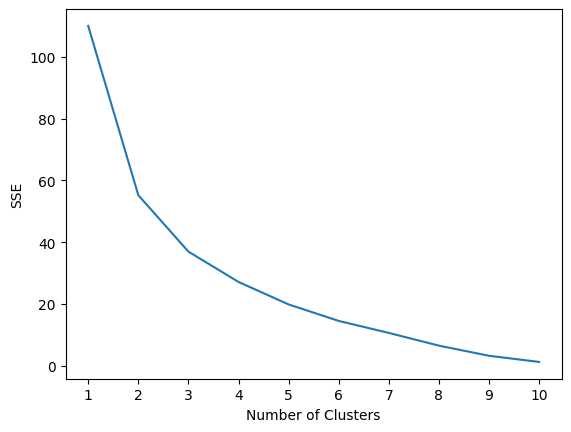

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The elbow appears at k=3. Thus, the optimal number of clusters is 3.

Question 5(a)

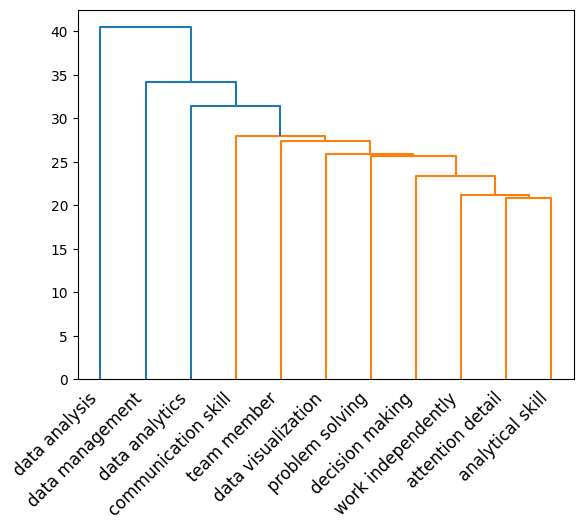

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

dists = squareform(dist_matrix)
linkage_matrix = linkage(dists, "single")
dendrogram(linkage_matrix, labels=extracted_skills)
plt.xticks(rotation=45, ha='right')
plt.show()

Question 5(b)

In [ ]:
# Apply PCA to reduce dimensionality to 2D
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(scaled_df)
X

array([[ 3.17049634,  0.9951333 ],
       [ 5.97631002, -1.06964625],
       [ 1.7684855 , -0.14897818],
       [ 0.07656672,  3.26407569],
       [-0.32959394, -1.83411368],
       [-2.60160021,  0.75641333],
       [-0.94898372, -1.80842869],
       [-1.23911824, -0.12944734],
       [-0.87815775,  1.61819561],
       [-2.37825903, -0.58855712],
       [-2.61614569, -1.05464668]])

<ipython-input-49-5c8e116cdf71>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),


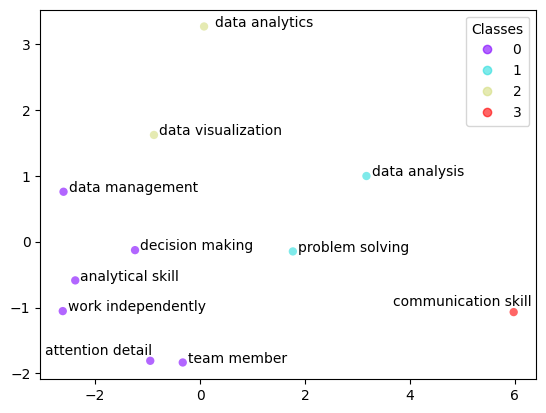

In [ ]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, **kwargs)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

for i in range(0, len(extracted_skills)):
  skill = extracted_skills[i]
  xi = X[:, 0][i]
  yi = X[:, 1][i]
  if skill == "communication skill":
    ax.text(x=xi-2.3, y=yi+0.1, s=skill)
  elif skill == "data analytics":
    ax.text(x=xi+0.2, y=yi, s=skill)
  elif skill == "attention detail":
    ax.text(x=xi-2, y=yi+0.1, s=skill)
  else:
    ax.text(x=xi+0.1, y=yi, s=skill)

plt.show()